# Statistics

In [1]:
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/solar.csv')
df.columns

Index(['TimeUtc', 'TimeZone', 'LocalTime', 'Year', 'MonthOfYear', 'WeekOfYear',
       'DayOfYear', 'HourOfDay', 'Latitude', 'Longitude', 'Altitude',
       'ApparentZenith', 'Zenith', 'ApparentElevation', 'Elevation', 'Azimuth',
       'Temperature', 'Pressure', 'Humidity', 'LinkeTurbidity',
       'PrecipitableWater', 'WindSpeed', 'WindDirection', 'ExtraRadiation',
       'GHI', 'DNI', 'DHI'],
      dtype='object')

In [5]:
# USeful function

In [101]:
def plot_distribution(df_column, Title, xlabel, color):
    """Return a distribution plot"""

    plt.title(Title, fontsize=16)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel('Frecuencia')
    df_column.hist(color=color)
    plt.tight_layout()

def box_plot(df, column):
    """Plot a boxplot"""

    boxprops = dict(linestyle='-', linewidth=4, color='#ff9900')
    medianprops = dict(linestyle='-', linewidth=4, color='skyblue')
    plt.tight_layout()
    dfnum.boxplot(column=column,
                  showmeans=True, 
                  boxprops=boxprops,
                  medianprops=medianprops)

def drop_atipycs(df):
    """Return dataframe without atipycal values"""

    dfn = df.copy()

    for feature in dfn.columns:
        q75, q25 = np.percentile(dfn[feature], [75, 25])
        iqr = q75 - q25
        sup = q75 + 1.5 * iqr
        inf = q25 - 1.5 * iqr
        mask = ((dfn[feature] > sup) | (dfn[feature] < inf))
        num_atipyc = dfn[feature][mask].count()
        index = dfn[feature][mask].index
        dfn.drop(index, inplace=True)
    return dfn

In [59]:
# Drop atypical values

In [82]:
# New Dataset
dfn = df[['Year', 'MonthOfYear', 'WeekOfYear',
       'DayOfYear', 'HourOfDay', 'Latitude', 'Longitude', 'Altitude',
       'ApparentZenith', 'Zenith', 'ApparentElevation', 'Elevation', 'Azimuth',
       'Temperature', 'Pressure', 'Humidity', 'LinkeTurbidity',
       'PrecipitableWater', 'WindSpeed', 'WindDirection', 'ExtraRadiation',
       'GHI', 'DNI', 'DHI']]

df = drop_atipycs(dfn)
df = drop_atipycs(df)

In [46]:
# Histograms plot (Distribution)

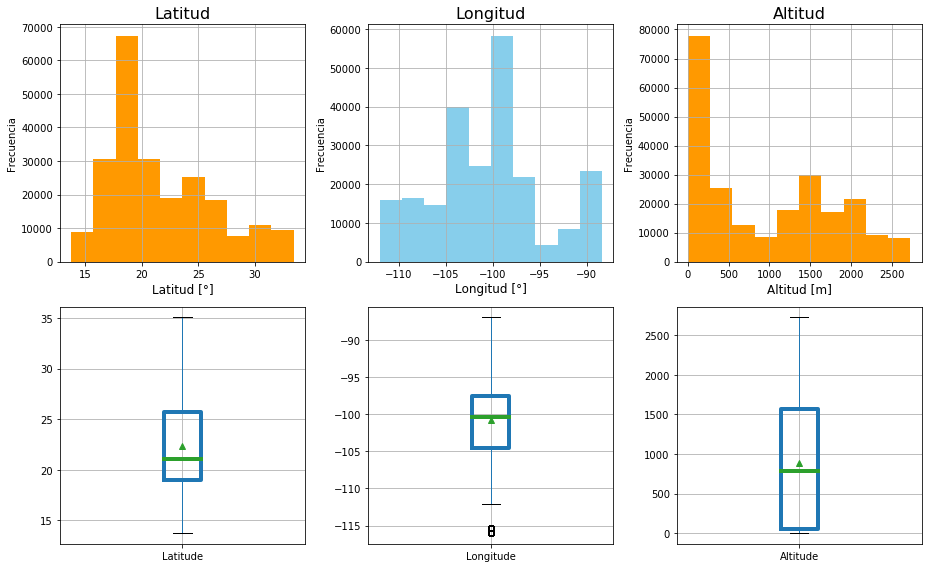

In [69]:
# Geographical variables
plt.rcParams['figure.figsize'] = [13, 8]
plt.subplot(2,3,1)
plot_distribution(df.Latitude, 'Latitud', 'Latitud [°]', '#ff9900')
plt.subplot(2,3,4)
box_plot(df, 'Latitude')
plt.subplot(2,3,2)
plot_distribution(df.Longitude, 'Longitud', 'Longitud [°]', 'skyblue')
plt.subplot(2,3,5)
box_plot(df, 'Longitude')
plt.subplot(2,3,3)
plot_distribution(df.Altitude, 'Altitud', 'Altitud [m]', '#ff9900')
plt.subplot(2,3,6)
box_plot(df, 'Altitude')

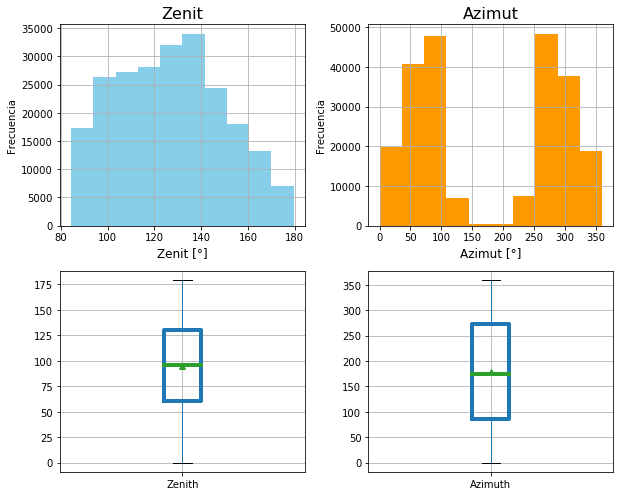

In [71]:
# Solar geometry variables
plt.rcParams['figure.figsize'] = [13, 7]
plt.subplot(2,3,1)
plot_distribution(df.Zenith, 'Zenit', 'Zenit [°]', 'skyblue')
plt.subplot(2,3,4)
box_plot(df, 'Zenith')
plt.subplot(2,3,2)
plot_distribution(df.Azimuth, 'Azimut', 'Azimut [°]', '#ff9900')
plt.subplot(2,3,5)
box_plot(df, 'Azimuth')

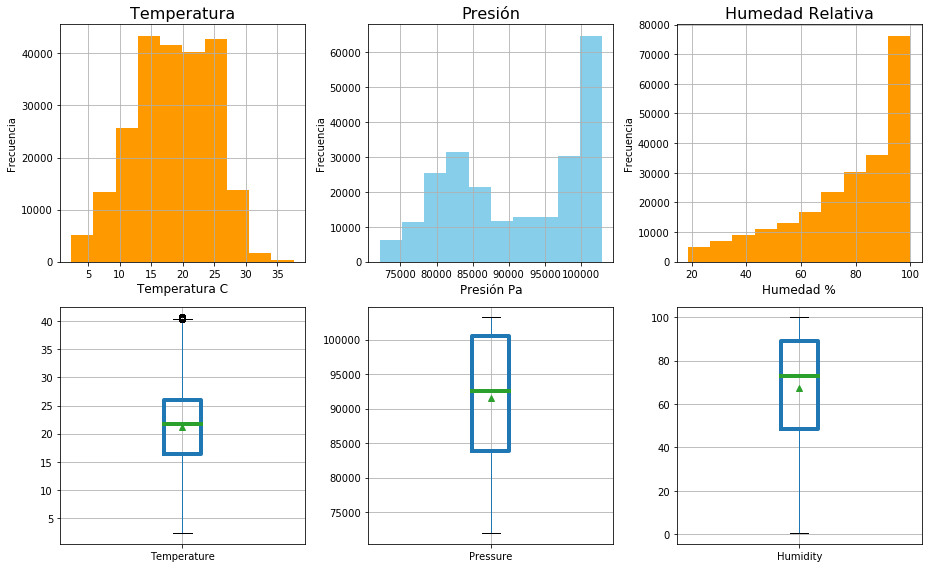

In [73]:
#Atmospheric and climatologic varibales
plt.rcParams['figure.figsize'] = [13, 8]
plt.subplot(2,3,1) 
plot_distribution(df.Temperature, 'Temperatura', 'Temperatura C', '#ff9900')
plt.subplot(2,3,4) 
box_plot(df, 'Temperature') 
plt.subplot(2,3,2) 
plot_distribution(df.Pressure, 'Presión', 'Presión Pa', 'skyblue') 
plt.subplot(2,3,5) 
box_plot(df, 'Pressure') 
plt.subplot(2,3,3) 
plot_distribution(df.Humidity, 'Humedad Relativa', 'Humedad %', '#ff9900') 
plt.subplot(2,3,6) 
box_plot(df, 'Humidity')

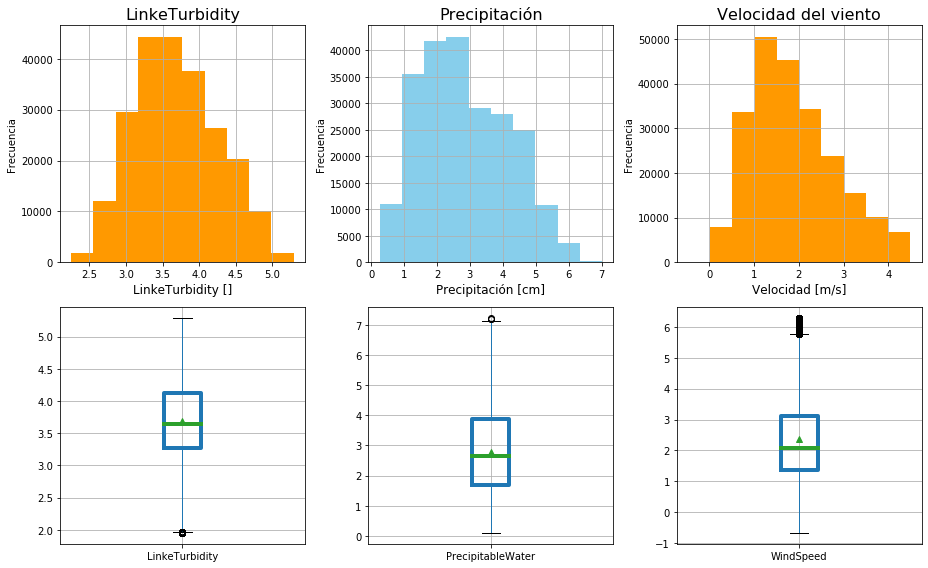

In [74]:
#Atmospheric and climatologic varibales
plt.rcParams['figure.figsize'] = [13, 8]
plt.subplot(2,3,1)
plot_distribution(df.LinkeTurbidity, 'LinkeTurbidity', 'LinkeTurbidity []', '#ff9900')
plt.subplot(2,3,4) 
box_plot(df, 'LinkeTurbidity')
plt.subplot(2,3,2)
plot_distribution(df.PrecipitableWater, 'Precipitación', 'Precipitación [cm]', 'skyblue')
plt.subplot(2,3,5) 
box_plot(df, 'PrecipitableWater')
plt.subplot(2,3,3)
plot_distribution(df.WindSpeed, 'Velocidad del viento', 'Velocidad [m/s]', '#ff9900')
plt.subplot(2,3,6) 
box_plot(df, 'WindSpeed')

In [76]:
# Radiation

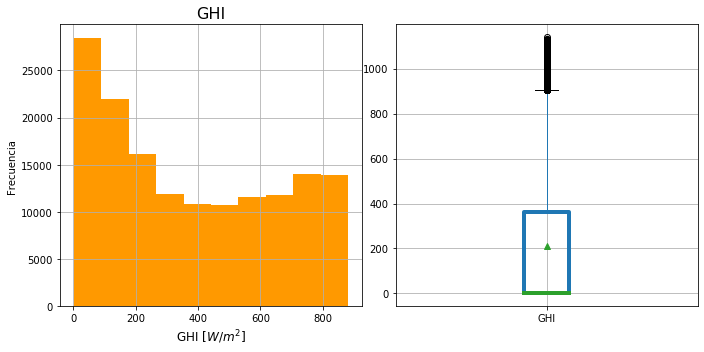

In [102]:
df_ghi = df.copy()
mask = (df_ghi.GHI != 0)
df_ghi_ = df_ghi[mask]
plt.rcParams['figure.figsize'] = [10, 5]
plt.subplot(1,2,1)
plot_distribution(df_ghi_.GHI, 'GHI', 'GHI $[W/m^2]$', '#ff9900')
plt.subplot(1,2,2)
box_plot(df_ghi_, 'GHI')

# Selection of model family 

In [67]:
# Read and choose useful variables
df = pd.read_csv('../data/solar.csv')
df = df[['Year', 'MonthOfYear', 'WeekOfYear', 'DayOfYear',
         'HourOfDay', 'Latitude', 'Longitude', 'Altitude',
         'ApparentZenith', 'Zenith', 'Azimuth',
         'Temperature', 'Pressure', 'Humidity', 'LinkeTurbidity',
         'PrecipitableWater', 'WindSpeed', 'WindDirection', 'ExtraRadiation',
         'GHI']]

In [5]:
# Selection between lienar k.mean or ensemble model
# Import models to test
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor

In [11]:
# Test models

# ------Linear Models------
linear_model = make_pipeline(StandardScaler(),
                             PolynomialFeatures(2),
                             LinearRegression())
ridge_model = make_pipeline(StandardScaler(),
                            PolynomialFeatures(2),
                            Ridge())
sgd_model = make_pipeline(StandardScaler(),
                            PolynomialFeatures(2),
                            SGDRegressor())
linear_models = {
    'LinearRegression': linear_model,
    'Ridge': ridge_model,
    'SGDRegressor': sgd_model,
}
# ------Kmeans Models------
kn_distance_model = KNeighborsRegressor(weights='distance')
kn_normal_model = KNeighborsRegressor()
kn_models = {
    'KNRegressor 1': kn_distance_model,
    'KNRegressor 2': kn_normal_model,
}
# ------Ensemble Models------
rfr_model = RandomForestRegressor()
gbr_model = GradientBoostingRegressor()
hist_gbr_model = HistGradientBoostingRegressor()
ensemble_models = {
    'RandomForrestRegressor': rfr_model,
    'GradientBoostingRegressor': gbr_model,
    'HistGradientBoostingRegressor': hist_gbr_model,
}

In [12]:
# Create sets of training and test
from sklearn.model_selection import train_test_split
y = df['GHI']
X = df.drop(['GHI'], axis=1)
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=.15)

In [13]:
# Useful function

def _get_performance(name, model,Xtrain, Xtest, ytrain, ytest):
    """Print the performance of the model"""

    from sklearn.metrics import r2_score, mean_squared_error

    model.fit(Xtrain, ytrain)
    prediction = model.predict(Xtest)
    mse = mean_squared_error(ytest, prediction)
    r2 = r2_score(ytest, prediction)

    print('='*50)
    print(f'Modelo:  {name}')
    print('R2:  {:0.4f}\nMSE:  {:0.4f}'.format(r2, mse))

In [15]:
# Make comparation
models = {
    'Lineales': linear_models,
    'KNeighborgs': kn_models,
    'De ensamble': ensemble_models,
}

for type_model, dict_model in models.items():
    print(f'\n***********************************{type_model}*************************************')
    for name, model in dict_model.items():
        _get_performance(name, model, Xtrain, Xtest, ytrain, ytest)


***********************************Lineales*************************************
Modelo:  LinearRegression
R2:  0.9055
MSE:  10173.5437
Modelo:  Ridge
R2:  0.8964
MSE:  11163.0482
Modelo:  SGDRegressor
R2:  0.8916
MSE:  11669.2862

***********************************KNeighborgs*************************************
Modelo:  KNRegressor 1
R2:  0.9074
MSE:  9973.5011
Modelo:  KNRegressor 2
R2:  0.9046
MSE:  10272.6698

***********************************De ensamble*************************************
Modelo:  RandomForrestRegressor
R2:  0.9330
MSE:  7219.0954
Modelo:  GradientBoostingRegressor
R2:  0.9190
MSE:  8720.4968
Modelo:  HistGradientBoostingRegressor
R2:  0.9287
MSE:  7683.0712


#### The best are the ensembled methods

# First Variable Selection

In [68]:
# Correlation between feature and target
corr = df.corr()

In [69]:
corr['GHI']

Year                 0.005233
MonthOfYear         -0.042955
WeekOfYear          -0.043905
DayOfYear           -0.043092
HourOfDay            0.193254
Latitude             0.009272
Longitude           -0.022332
Altitude             0.016276
ApparentZenith      -0.840619
Zenith              -0.840875
Azimuth             -0.001738
Temperature          0.457306
Pressure            -0.023403
Humidity            -0.454882
LinkeTurbidity       0.063624
PrecipitableWater   -0.045840
WindSpeed            0.175379
WindDirection        0.068020
ExtraRadiation      -0.103634
GHI                  1.000000
Name: GHI, dtype: float64

In [89]:
# HeatPlot
plt.rcParams['figure.figsize'] = [4,9]
plt.tight_layout()
plt.title('Heat map de correlaciones\n',
          fontsize=18)
sns.heatmap(corr.iloc[:, [-1]]*100, 
            cmap='RdYlBu',
            vmax=100,
            vmin=-100,
            annot=True,
            annot_kws={'fontsize':12});

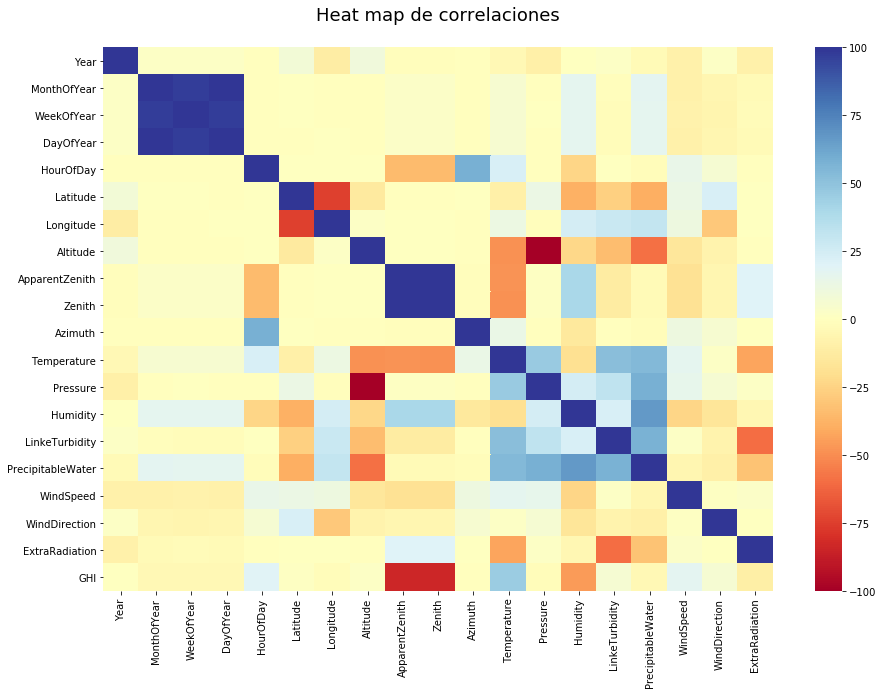

In [167]:
corr_features = corr.drop(['GHI'], axis=1)
plt.rcParams['figure.figsize'] = [15,10]
plt.tight_layout()
plt.title('Heat map de correlaciones\n',
          fontsize=18)
sns.heatmap(corr_features*100, 
            cmap='RdYlBu',
            vmax=100,
            vmin=-100,);

In [75]:
# Elimination of the baddest features
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

df = pd.read_csv('../data/solar.csv')

In [76]:
# Best Features

def importances(model, Xtrain, ytrain, width=15, heigth=5):
    """Plot the feature imporyances"""

    weights = model.fit(Xtrain, ytrain).feature_importances_
    plt.rcParams['figure.figsize'] = [width, heigth]
    plt.plot(weights, c='#ff9900')
    plt.title('Importancia de los feutures',
             fontsize=18)
    plt.xticks(np.arange(len(Xtrain.columns)),
               labels=Xtrain.columns, rotation='vertical');
    plt.show();


def check_and_drop(model, X, y, Xtrain=Xtrain, ytrain=ytrain, _features=None, num_drop=10):
    """Return the best features"""

    from sklearn.model_selection import cross_val_score

    if _features != None :
        features = _features
    else:
        features = get_order_features(model, Xtrain, ytrain)
        
    del_features = [i for i in range(num_drop)]
    report = []

    for i in range(num_drop):
        _X = X[features]
        score = cross_val_score(model, _X, y).mean()
        del_features[i] = features.pop()
        report.append({'Features removed': del_features[:i+1],
                        'Score': score})        

    return report


def get_order_features(model, Xtrain, ytrain):
    """Return fetures sorted by their importances"""
    
    model.fit(Xtrain, ytrain)
    weights = model.feature_importances_
    we = dict(zip(Xtrain.columns,weights))
    
    import operator
    we_sort = sorted(we.items(), key=operator.itemgetter(1))
    features_by_model = []
    
    for i in range(len(we_sort)):
        c = (-i)-1
        features_by_model.append(we_sort[c][0])
        
    return features_by_model

In [77]:
# Feature eliminitacion
best_by_corr = ['Zenith', 'Temperature','Humidity',
                'HourOfDay', 'WindSpeed','ExtraRadiation',
                'WindDirection', 'LinkeTurbidity', 'PrecipitableWater',
                'WeekOfYear', 'DayOfYear', 'MonthOfYear', 'Pressure',
                'Longitude', 'Altitude', 'Latitude',]

X = df[best_by_corr]
y = df['GHI']
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y)

model = XGBRegressor()
best_by_xgbr = get_order_features(model, Xtrain, ytrain)
Xtrain = Xtrain[best_by_xgbr]

In [78]:
# Plot importances
importances(model, Xtrain, ytrain, width=15, heigth=5)

# Best Variables

In [91]:
# Selection of best variables
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

df = pd.read_csv('../data/solar.csv')
y = df['GHI']
X = df[['Zenith', 'Temperature','Humidity',
        'HourOfDay', 'WindSpeed','ExtraRadiation',
        'WindDirection', 'LinkeTurbidity', 'PrecipitableWater',
        'WeekOfYear', 'DayOfYear', 'MonthOfYear', 'Pressure',
        'Longitude', 'Altitude', 'Latitude',]]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

rfr = RandomForestRegressor(max_depth=20)
xgbr = XGBRegressor()

In [92]:
def get_best_features(model, X_train, y_train):
    """Return df with the best variables"""
    
    model.fit(X_train, y_train)
    feature_importances = model.feature_importances_

    X_train_opt = X_train.copy()
    removed_columns = pd.DataFrame()
    models = []
    r2s_opt = []

    for i in range(0,10):
        least_important = np.argmin(feature_importances)
        removed_columns = removed_columns.append(X_train_opt.pop(X_train_opt.columns[least_important]))

        model.fit(X_train_opt, y_train)
        feature_importances = model.feature_importances_
        scores = cross_val_score(estimator=model,
                                 X=X_train_opt,
                                 y=y_train, cv=5,
                                 scoring='r2')
        r2s_opt = np.append(r2s_opt, scores.mean())
        models = np.append(models, ", ".join(list(X_train_opt)))


    feature_selection = pd.DataFrame({'Features':models,'r2 Score':r2s_opt})
    
    return feature_selection, removed_columns

In [93]:
# Best and lees importance Features
(feature_selecion_xgbr, 
 removed_cols_xgbr) = get_best_features(xgbr, X_train, y_train)

In [94]:
feature_selecion_xgbr

Features  r2 Score
0  Zenith, Temperature, Humidity, HourOfDay, Wind...  0.929692
1  Zenith, Temperature, Humidity, HourOfDay, Wind...  0.929052
2  Zenith, Temperature, Humidity, HourOfDay, Wind...  0.929182
3  Zenith, Temperature, Humidity, HourOfDay, Wind...  0.928527
4  Zenith, Temperature, Humidity, HourOfDay, Extr...  0.928075
5  Zenith, Temperature, Humidity, HourOfDay, Extr...  0.927781
6  Zenith, Temperature, Humidity, HourOfDay, Extr...  0.927981
7  Zenith, Temperature, Humidity, HourOfDay, Week...  0.926768
8  Zenith, Temperature, Humidity, HourOfDay, Long...  0.924872
9  Zenith, Humidity, HourOfDay, Longitude, Altitu...  0.922507

In [95]:
removed_cols_xgbr

0             1             2             4       \
PrecipitableWater      2.726047      2.804144      2.876138      3.008491   
LinkeTurbidity         3.675000      3.675000      3.675000      3.675000   
MonthOfYear           12.000000     12.000000     12.000000     12.000000   
WindDirection        197.000000    195.000000    192.000000    135.000000   
WindSpeed              1.980000      2.050000      2.130000      2.290000   
DayOfYear            365.000000    365.000000    365.000000    365.000000   
Pressure           92229.000000  92304.000000  92380.000000  92465.000000   
ExtraRadiation      1413.940576   1413.940576   1413.940576   1413.940576   
WeekOfYear            53.000000     53.000000     53.000000     53.000000   
Temperature           24.240000     23.860001     23.469999     22.709999   

                         5             6             7             10      \
PrecipitableWater      3.068424      3.121828      3.173354      3.372263   
LinkeTurbidity         3.675000      3.695968      3.695968      3.695968   
MonthOfYear           12.000000      1.000000      1.000000      1.000000   
WindDirection        107.000000     89.000000     72.000000     45.000000   
WindSpeed              2.360000      2.440000      2.520000      0.880000   
DayOfYear            365.000000      1.000000      1.000000      1.000000   
Pressure           92508.000000  92505.000000  92502.000000  92517.000000   
ExtraRadiation      1413.940576   1413.981805   1413.981805   1413.981805   
WeekOfYear            53.000000     53.000000     53.000000     53.000000   
Temperature           22.330000     21.940001     21.559999     20.440001   

                         12            16      ...        551804  \
PrecipitableWater      3.381239      2.818318  ...      1.355914   
LinkeTurbidity         3.695968      3.695968  ...      3.050000   
MonthOfYear            1.000000      1.000000  ...     12.000000   
WindDirection         38.000000     46.000000  ...     53.000000   
WindSpeed              0.890000      3.830000  ...      0.930000   
DayOfYear              1.000000      1.000000  ...    365.000000   
Pressure           92574.000000  92611.000000  ...  76849.000000   
ExtraRadiation      1413.981805   1413.981805  ...   1413.940576   
WeekOfYear            53.000000     53.000000  ...     52.000000   
Temperature           21.680000     26.410000  ...      9.250000   

                         551805        551807        551808        551810  \
PrecipitableWater      1.344802      1.559633      1.671149      1.457924   
LinkeTurbidity         3.050000      3.050000      3.050000      3.050000   
MonthOfYear           12.000000     12.000000     12.000000     12.000000   
WindDirection         54.000000     64.000000     70.000000    112.000000   
WindSpeed              1.080000      1.090000      1.090000      2.120000   
DayOfYear            365.000000    365.000000    365.000000    365.000000   
Pressure           76854.000000  76969.000000  77027.000000  76917.000000   
ExtraRadiation      1413.940576   1413.940576   1413.940576   1413.940576   
WeekOfYear            52.000000     52.000000     52.000000     52.000000   
Temperature            9.070000     13.220000     15.290000     23.620001   

                         551811        551812        551813        551814  \
PrecipitableWater      1.514183      1.562505      1.600935      1.632460   
LinkeTurbidity         3.050000      3.050000      3.050000      3.050000   
MonthOfYear           12.000000     12.000000     12.000000     12.000000   
WindDirection        133.000000    144.000000    156.000000    167.000000   
WindSpeed              2.150000      2.170000      2.200000      2.220000   
DayOfYear            365.000000    365.000000    365.000000    365.000000   
Pressure           76861.000000  76773.000000  76685.000000  76597.000000   
ExtraRadiation      1413.940576   1413.940576   1413.940576   1413.940576   
WeekOfYear            52.000000     52.

In [96]:
(feature_selecion_rfr, 
 removed_cols_rfr) = get_best_features(rfr, X_train, y_train)

In [97]:
feature_selecion_rfr

Features  r2 Score
0  Zenith, Temperature, Humidity, HourOfDay, Wind...  0.930300
1  Zenith, Temperature, Humidity, HourOfDay, Wind...  0.930176
2  Zenith, Temperature, Humidity, HourOfDay, Wind...  0.930057
3  Zenith, Temperature, Humidity, WindSpeed, Extr...  0.929701
4  Zenith, Temperature, Humidity, WindSpeed, Extr...  0.929251
5  Zenith, Temperature, Humidity, WindSpeed, Extr...  0.928668
6  Zenith, Temperature, Humidity, WindSpeed, Extr...  0.926627
7  Zenith, Temperature, Humidity, WindSpeed, Extr...  0.926603
8  Zenith, Temperature, Humidity, WindSpeed, Extr...  0.925246
9  Zenith, Temperature, Humidity, WindSpeed, Extr...  0.923834

In [98]:
removed_cols_rfr

0           1           2           4           5       \
MonthOfYear         12.000000   12.000000   12.000000   12.000000   12.000000   
WeekOfYear          53.000000   53.000000   53.000000   53.000000   53.000000   
Altitude           787.000000  787.000000  787.000000  787.000000  787.000000   
HourOfDay           18.000000   19.000000   20.000000   22.000000   23.000000   
Latitude            18.000000   18.000000   18.000000   18.000000   18.000000   
DayOfYear          365.000000  365.000000  365.000000  365.000000  365.000000   
Longitude         -100.000000 -100.000000 -100.000000 -100.000000 -100.000000   
PrecipitableWater    2.726047    2.804144    2.876138    3.008491    3.068424   
LinkeTurbidity       3.675000    3.675000    3.675000    3.675000    3.675000   
WindDirection      197.000000  195.000000  192.000000  135.000000  107.000000   

                       6           7           10          12          16      \
MonthOfYear          1.000000    1.000000    1.000000    1.000000    1.000000   
WeekOfYear          53.000000   53.000000   53.000000   53.000000   53.000000   
Altitude           787.000000  787.000000  787.000000  787.000000  787.000000   
HourOfDay            0.000000    1.000000    4.000000    6.000000   10.000000   
Latitude            18.000000   18.000000   18.000000   18.000000   18.000000   
DayOfYear            1.000000    1.000000    1.000000    1.000000    1.000000   
Longitude         -100.000000 -100.000000 -100.000000 -100.000000 -100.000000   
PrecipitableWater    3.121828    3.173354    3.372263    3.381239    2.818318   
LinkeTurbidity       3.695968    3.695968    3.695968    3.695968    3.695968   
WindDirection       89.000000   72.000000   45.000000   38.000000   46.000000   

                   ...       551804       551805       551807       551808  \
MonthOfYear        ...    12.000000    12.000000    12.000000    12.000000   
WeekOfYear         ...    52.000000    52.000000    52.000000    52.000000   
Altitude           ...  2304.000000  2304.000000  2304.000000  2304.000000   
HourOfDay          ...     4.000000     5.000000     7.000000     8.000000   
Latitude           ...    19.322260    19.322260    19.322260    19.322260   
DayOfYear          ...   365.000000   365.000000   365.000000   365.000000   
Longitude          ...   -98.230103   -98.230103   -98.230103   -98.230103   
PrecipitableWater  ...     1.355914     1.344802     1.559633     1.671149   
LinkeTurbidity     ...     3.050000     3.050000     3.050000     3.050000   
WindDirection      ...    53.000000    54.000000    64.000000    70.000000   

                        551810       551811       551812       551813  \
MonthOfYear          12.000000    12.000000    12.000000    12.000000   
WeekOfYear           52.000000    52.000000    52.000000    52.000000   
Altitude           2304.000000  2304.000000  2304.000000  2304.000000   
HourOfDay            10.000000    11.000000    12.000000    13.000000   
Latitude             19.322260    19.322260    19.322260    19.322260   
DayOfYear           365.000000   365.000000   365.000000   365.000000   
Longitude           -98.230103   -98.230103   -98.230103   -98.230103   
PrecipitableWater     1.457924     1.514183     1.562505     1.600935   
LinkeTurbidity        3.050000     3.050000     3.050000     3.050000   
WindDirection       112.000000   133.000000   144.000000   156.000000   

                        551814       551816  
MonthOfYear          12.000000    12.000000  
WeekOfYear           52.000000    52.000000  
Altitude           2304.000000  2304.000000  
HourOfDay            14.000000    16.000000  
Latitude             19.322260    19.322260  
DayOfYear           365.000000   365.000000  
Longitude           -98.230103   -98.230103  
PrecipitableWater     1.632460     1.673535  
LinkeTurbidity        3.050000     3.050000  
WindDirection       167.000000   149.000000  

[10 rows x 413862 columns]

# Enrichment data

In [94]:
# Load data

features = [
    'Zenith', 'Temperature','Humidity',
    'HourOfDay', 'WindSpeed','ExtraRadiation',
    'WindDirection', 'LinkeTurbidity', 'PrecipitableWater',
    'WeekOfYear', 'DayOfYear', 'MonthOfYear', 'Pressure',
    'Longitude', 'Altitude', 'Latitude',
]

df = pd.read_csv('../data/solar.csv')
X = df[features]
y = df['GHI']

# Train sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [98]:
# Adding new variables function
from sklearn.model_selection import cross_val_score
import xgboost as xgb

def score_with_added_feature(Xnew, y_train):
    """Return score with new variable"""

    model = xgb.XGBRegressor()

    importances = model.fit(Xnew, y_train).feature_importances_
    max_importance = Xnew.columns[np.argmax(importances)]
    less_importance = Xnew.columns[np.argmin(importances)]

    features = dict(zip(Xnew.columns,importances))
    sort_features = sorted(
        features.items(),
        key=lambda x: x[1], 
        reverse=True
    )
    sorted_names = list(dict(sort_features).keys())
    ranking = sorted_names.index(Xnew.columns[-1]) + 1

    score = cross_val_score(model, Xnew, y_train, cv=5, scoring='r2')

    print('='*100)
    print('R2 = ', score.mean())
    print('More important feature:', max_importance)
    print('Less important feature:', less_importance)
    print(f'Ranking: {ranking} of {len(importances)}')
    print('='*100)

In [99]:
# No adding nothing
# Move Zenith for last pisition

Xnew = X_train.copy()
Xnew = Xnew.drop(['Zenith'], axis=1)
Xnew['Zenith'] = X_train['Zenith']
score_with_added_feature(Xnew, y_train)

R2 =  0.9295887901153627
More important feature: Zenith
Less important feature: PrecipitableWater
Ranking: 1 of 16


In [110]:
# Adding cos(zenith)

Xnew = X_train.copy()
Xnew['cos(Zenith)'] = np.cos( X_train['Zenith'] )
score_with_added_feature(Xnew, y_train)

R2 =  0.9294553291470228
More important feature: Zenith
Less important feature: cos(Zenith)
Ranking: 17 of 17


In [105]:
# Adding sin(zenith)

Xnew = X_train.copy()
Xnew['sin(Zenith)'] = np.sin( X_train['Zenith'] )
score_with_added_feature(Xnew, y_train)

R2 =  0.9294573575281244
More important feature: Zenith
Less important feature: sin(Zenith)
Ranking: 17 of 17


In [106]:
# Adding tan(zenith)

Xnew = X_train.copy()
Xnew['sin(Zenith)'] = np.tan( X_train['Zenith'] )
score_with_added_feature(Xnew, y_train)

R2 =  0.9295305431424021
More important feature: Zenith
Less important feature: sin(Zenith)
Ranking: 17 of 17


In [107]:
# Adding relative AM

import pvlib
Xnew = X_train.copy()
rel_air_mass = pvlib.atmosphere.get_relative_airmass(
    zenith=X_train['Zenith'],
    model='young1994'
)
Xnew['RelAirMass'] = rel_air_mass
score_with_added_feature(Xnew, y_train)

R2 =  0.9295801191575359
More important feature: Zenith
Less important feature: RelAirMass
Ranking: 17 of 17


In [108]:
# Adding absolute AM

Xnew = X_train.copy()
abs_air_mass = pvlib.atmosphere.get_absolute_airmass(
    airmass_relative=rel_air_mass,
    pressure=X_train['Pressure']
)
Xnew['AbsAirMass'] = abs_air_mass
score_with_added_feature(Xnew, y_train)

R2 =  0.9290541882525186
More important feature: Zenith
Less important feature: PrecipitableWater
Ranking: 8 of 17


### Conclusiones

* Ambos modelos repiten algunas variables entre las menos importantes:
    * Latitud
    * Longitud
    * Altitud
    * Link Turbidty
    * Mes, Semana, Día y Hora del año

    Existen lugares con condiciones de radiación muy similares en la que su localización
    es muy distinta [x], lo cual afirma ka desición de remover la Latitud, la Longitud y la Altitud.
    Lo referente al tiempo puede despreciarse pues el ángulo cenital contiene a todos estos mientras que
    la link turbidity proviene de una base de datos estática (solo contempla ubicación y tiempo hora a hora)
    no contempla variaciones anuales [soda link turbidity], junto con ésto, el mismo modelo no encuentra
    reelevenate este dato por lo que será removido también.

In [115]:
# New data 
features = [
    'HourOfDay','Zenith',
    'Temperature','Humidity',
    'WindSpeed','WindDirection',
    'PrecipitableWater','Pressure',
    'ExtraRadiation',
]

df = pd.read_csv('../data/solar.csv')
df_new = df[features]
df_new['GHI'] = df['GHI']

# Save data
df_new.to_csv('../data/rad.csv', encoding='utf-8', index=False)

In [116]:
# Revision

df = pd.read_csv('../data/rad.csv')
df.head(1)

HourOfDay     Zenith  Temperature  Humidity  WindSpeed  WindDirection  \
0         18  87.508232        24.24     56.84       1.98          197.0   

   PrecipitableWater  Pressure  ExtraRadiation  GHI  
0           2.726047   92229.0     1413.940576  0.0

In [119]:
# Score revision

X = df.drop(['GHI'], axis=1)
y = df['GHI']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

model = xgb.XGBRegressor()
score = cross_val_score(model, X_train, y_train, cv=6, scoring='r2')
print('R2 = ', score.mean())

R2 =  0.9247269055270629


In [123]:
X_train['AbsAirMass'] = abs_air_mass
score_with_added_feature(X_train, y_train)

R2 =  0.9243507349828508
More important feature: Zenith
Less important feature: AbsAirMass
Ranking: 10 of 10


In [124]:
X_train = X_train.drop(['AbsAirMass'], axis=1)
_estiator = xgb.XGBClassifier()
score = cross_val_score(_estiator, X_train, y_train)
print('Score = ', score.mean())